In [4]:
def count_upper(s):
    return sum([ x.isupper() for x in s ]) / len(s)

<AxesSubplot:xlabel='conspiracy', ylabel='upper'>

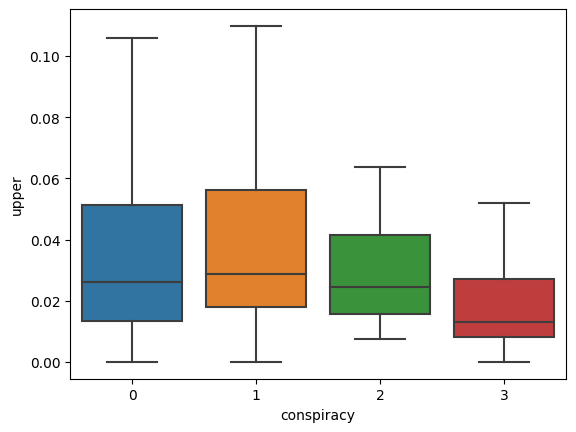

In [5]:
import pandas as pd
import seaborn as sns

df_B = pd.read_csv("subtaskB_train.csv")
df_B["upper"] = df_B.comment_text.map(count_upper)

sns.boxplot(data=df_B, x="conspiracy", y="upper",  showfliers =False)

<AxesSubplot:xlabel='conspiratorial', ylabel='upper'>

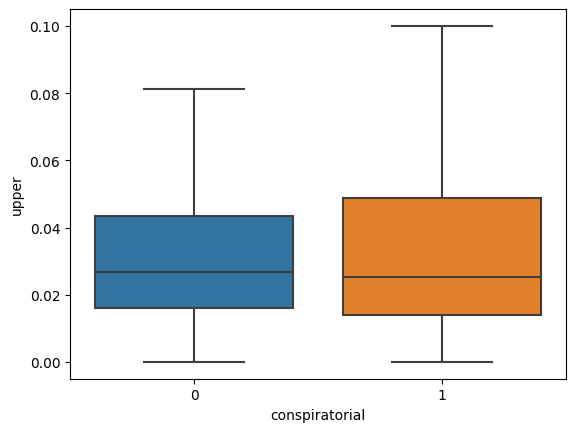

In [7]:
df_A = pd.read_csv("subtaskA_train.csv")
df_A["upper"] = df_A.comment_text.map(count_upper)

sns.boxplot(data=df_A, x="conspiratorial", y="upper",  showfliers =False)



<AxesSubplot:xlabel='conspiratorial', ylabel='punct'>

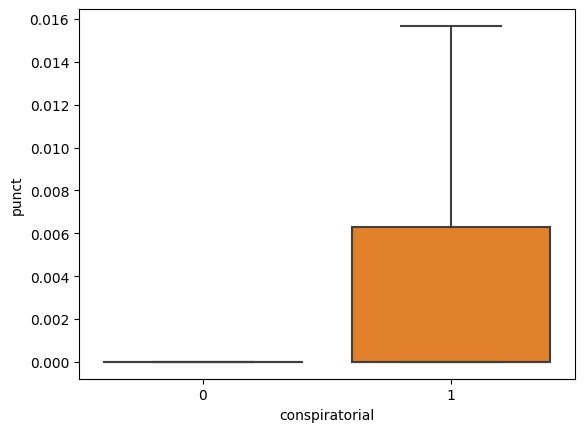

In [8]:
def count_punct(s):
    return (s.count("!") + s.count("?")) / len(s)

df = pd.read_csv("subtaskA_train.csv")
df["punct"] = df.comment_text.map(count_punct)

sns.boxplot(data=df, x="conspiratorial", y="punct",  showfliers =False)
# sns.boxplot(data=df, x="conspiracy", y="punct",  showfliers =False)

In [9]:
from gensim.models.keyedvectors import KeyedVectors

/home/dauin_user/f.giobergia/.local/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [71]:
wv = KeyedVectors.load_word2vec_format("it_k_5_alpha_0.4.w2v")

In [72]:
from sklearn.model_selection import train_test_split

In [69]:
df_A = pd.read_csv("subtaskA_train.csv")
df_A["upper"] = df_A.comment_text.map(count_upper)
df_A["punct"] = df_A.comment_text.map(count_punct)
df_B = pd.read_csv("subtaskB_train.csv")
df_B["upper"] = df_B.comment_text.map(count_upper)
df_B["punct"] = df_B.comment_text.map(count_punct)

df_A_train, df_A_test = train_test_split(df_A, train_size=.8, random_state=42)
df_B_train, df_B_test = train_test_split(df_B, train_size=.8, random_state=42)

In [73]:
wv.vectors = np.random.random(wv.vectors.shape)

In [ ]:
import pandas as pd
import numpy as np
from glob import glob
from unidecode import unidecode
from itertools import chain
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from unidecode import unidecode
from gensim.models.keyedvectors import KeyedVectors


def load_file(fname):
    with open(fname) as f:
        return [ unidecode(x.strip()) for x in f.readlines() ]

    
def load_w2v(all_tokens):
    wv = KeyedVectors.load_word2vec_format("it_k_5_alpha_0.375.w2v")
    
    tok_vecs = []
    for t in all_tokens:
        if t in wv:
            tok_vecs.append(wv[t])
        else:
            tok_vecs.append(np.zeros(wv.vector_size))
    return np.vstack(tok_vecs)

tokenizer = RegexpTokenizer(r'\w+')

def load_stopwords():
    files = list(map(load_file, glob("stopwords-it/*.txt")))
    return set(list(chain(*files))) | { 'ie', 'th' }

sw = load_stopwords()
use_mean = False

from tfidf import *
vocabs_tfidf, mat_tfidf = load_vocabs(df_A_train, df_B_train)

for task in ["A", "B"]:
    if task == "A":
        df = df_A_train
        df_test = df_A_test
    else:
        df = df_B_train
        df_test = df_B_test
    
    df_all = pd.concat([ df, df_test ])

    sent_size = 26
    tfidf_size = 6
    # other_size = 2
    # X = np.random.random((len(df_all), sent_size + tfidf_size ))
    X = np.zeros((len(df_all), sent_size + tfidf_size ))# + other_size))

    for i, msg in enumerate(df_all.comment_text):
        tokens = list(set(tokenizer.tokenize(msg)) - sw)

        n = 0
        for tok in tokens:
            if tok in wv or unidecode(tok) in wv:
                X[i, :sent_size] += wv[tok if tok in wv else unidecode(tok)]
                n += 1

            X[i, sent_size:] += get_vec(tok, vocabs_tfidf, mat_tfidf)

        # use mean (else sum)
        if n and use_mean:
            X[i, :sent_size] /= n

    # X[:, -2] = df_all["upper"].values
    # X[:, -1] = df_all["punct"].values

    X = X[:, -6:]
    # X = X[:,:26]
    
    
    if task == "A":
        y_train = df.conspiratorial.values
        y_test = df_test.conspiratorial.values
    else:
        y_train = df.conspiracy.values
        y_test = df_test.conspiracy.values

    X_train, X_test = np.vsplit(X, [ len(df) ])

    from sklearn.model_selection import train_test_split


    # X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=.8, random_state=42, stratify=y)

    from sklearn.ensemble import RandomForestClassifier

    clf = RandomForestClassifier(100, n_jobs=-1, random_state=42)
    clf.fit(X_train, y_train)

    from sklearn.metrics import f1_score

    print("task", f1_score(y_test, clf.predict(X_test), average="macro"))

In [77]:
print("ASD")

ASD


In [ ]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier()
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average="macro")

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [184]:
import pandas as pd
import numpy as np
from glob import glob
from unidecode import unidecode
from itertools import chain
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from unidecode import unidecode
from gensim.models.keyedvectors import KeyedVectors


def load_file(fname):
    with open(fname) as f:
        return [ unidecode(x.strip()) for x in f.readlines() ]

    
def load_w2v(all_tokens):
    wv = KeyedVectors.load_word2vec_format("it_k_5_alpha_0.375.w2v")
    
    tok_vecs = []
    for t in all_tokens:
        if t in wv:
            tok_vecs.append(wv[t])
        else:
            tok_vecs.append(np.zeros(wv.vector_size))
    return np.vstack(tok_vecs)

tokenizer = RegexpTokenizer(r'\w+')

def load_stopwords():
    files = list(map(load_file, glob("stopwords-it/*.txt")))
    return set(list(chain(*files))) | { 'ie', 'th' }

sw = load_stopwords()
use_mean = True

task = "B"

df_A = pd.read_csv("subtaskA_train.csv")
df_A["upper"] = df_A.comment_text.map(count_upper)
df_A["punct"] = df_A.comment_text.map(count_punct)
df_B = pd.read_csv("subtaskB_train.csv")
df_B["upper"] = df_B.comment_text.map(count_upper)
df_B["punct"] = df_B.comment_text.map(count_punct)

vals = {
    "A": [],
    "B": []
}

for task in ["A", "B"]:
    if task == "A":
        df = df_A
    else:
        df = df_B

    from tfidf import *
    vocabs_tfidf, mat_tfidf = load_vocabs()

    sent_size = 26
    tfidf_size = 6
    other_size = 2
    X = np.zeros((len(df), sent_size + tfidf_size + other_size))

    for i, msg in enumerate(df.comment_text):
        tokens = list(set(tokenizer.tokenize(msg)) - sw)

        n = 0
        for tok in tokens:
            if tok in wv or unidecode(tok) in wv:
                X[i, :sent_size] += wv[tok if tok in wv else unidecode(tok)]
                n += 1

            X[i, sent_size:-2] += get_vec(tok, vocabs_tfidf, mat_tfidf)

        # use mean (else sum)
        if n and use_mean:
            X[i, :sent_size] /= n

    X[:, -2] = df["upper"].values
    X[:, -1] = df["punct"].values
    
    
    if task == "A":
        y = df_A.conspiratorial
    else:
        y = df_B.conspiracy


    from sklearn.model_selection import train_test_split

    if task == "A":
        X = X[:, -8:-2]
    else:
        X = X[:, -8:]
    
    for i in range(1):
        X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=.8, random_state=i, stratify=y)

        from sklearn.ensemble import RandomForestClassifier

        clf = RandomForestClassifier(100, n_jobs=-1, random_state=i)
        clf.fit(X_train, y_train)

        from sklearn.metrics import f1_score
        
        score = f1_score(y_val, clf.predict(X_val), average="macro")
        print("task", task, "f1", score)
        vals[task].append(score)

task A f1 0.8536488630354309
task B f1 0.9035382491904231


In [136]:
from scipy.stats import norm, sem

In [147]:
a, b = norm.interval(0.95, loc=np.mean(vals["A"]), scale=sem(vals["A"]))
print((a+b)/2, (b-a)/2)

print()
a, b = norm.interval(0.95, loc=np.mean(vals["B"]), scale=sem(vals["B"]))
print((a+b)/2, (b-a)/2)

0.85494761633918 0.01063303338717736

0.8971405013305478 0.021496338254531677


In [174]:
task = "B"

df_A = pd.read_csv("subtaskA_train.csv")
df_A_test = pd.read_csv("subtaskA_test.csv")
df_A["upper"] = df_A.comment_text.map(count_upper)
df_A["punct"] = df_A.comment_text.map(count_punct)
df_A_test["upper"] = df_A_test.comment_text.map(count_upper)
df_A_test["punct"] = df_A_test.comment_text.map(count_punct)

df_B = pd.read_csv("subtaskB_train.csv")
df_B_test = pd.read_csv("subtaskB_test.csv")
df_B["upper"] = df_B.comment_text.map(count_upper)
df_B["punct"] = df_B.comment_text.map(count_punct)
df_B_test["upper"] = df_B_test.comment_text.map(count_upper)
df_B_test["punct"] = df_B_test.comment_text.map(count_punct)

vals = {
    "A": [],
    "B": []
}

for task in ["A", "B"]:
    if task == "A":
        df = df_A
        df_test = df_A_test
    else:
        df = df_B
        df_test = df_B_test

    from tfidf import *
    vocabs_tfidf, mat_tfidf = load_vocabs()

    sent_size = 26
    tfidf_size = 6
    other_size = 2
    X = np.zeros((len(df) + len(df_test), sent_size + tfidf_size + other_size))
    
    df_all = pd.concat([df, df_test])

    for i, msg in enumerate(df_all.comment_text):
        tokens = list(set(tokenizer.tokenize(msg)) - sw)

        n = 0
        for tok in tokens:
            if tok in wv or unidecode(tok) in wv:
                X[i, :sent_size] += wv[tok if tok in wv else unidecode(tok)]
                n += 1

            X[i, sent_size:-2] += get_vec(tok, vocabs_tfidf, mat_tfidf)

        # use mean (else sum)
        if n and use_mean:
            X[i, :sent_size] /= n

    X[:, -2] = df_all["upper"].values
    X[:, -1] = df_all["punct"].values
    
    
    if task == "A":
        X = X[:, -8:-2]
    else:
        X = X[:, -8:]
    
    if task == "A":
        y = df_all.conspiratorial
    else:
        y = df_all.conspiracy
    
    X_train, X_test = np.vsplit(X, [len(df)])
    y_train, y_test = np.split(y, [len(df)])
    
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    clf = RandomForestClassifier(100, n_jobs=-1, random_state=42)
    clf.fit(X_train, y_train)
    
    df_test["Expected"] = clf.predict(X_test).astype(int)


#     for i in range(10):
#         X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=.8, random_state=i, stratify=y)

#         from sklearn.ensemble import RandomForestClassifier

#         clf = RandomForestClassifier(100, n_jobs=-1, random_state=i)
#         clf.fit(X_train, y_train)

#         from sklearn.metrics import f1_score
        
#         score = f1_score(y_val, clf.predict(X_val), average="macro")
#         print("task", task, "f1", score)
#         vals[task].append(score)

(1842, 6) (460, 6) (1842,) (460,)
(810, 8) (300, 8) (810,) (300,)


In [182]:
df.shape

(810, 6)

In [180]:
df_A_test["Expected"].to_csv("output_A.csv", index_label="Id")
df_B_test["Expected"].to_csv("output_B.csv", index_label="Id")

In [181]:
!head -n 10 output_B.csv

Id,Expected
0,3
1,0
2,3
3,1
4,0
5,3
6,0
7,1
8,1
